In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, balanced_accuracy_score
import matplotlib as plt
import sklearn as skl
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_blobs
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


## Importing data

In [2]:
import os
from sqlalchemy import create_engine
import pandas as pd

database_path = os.path.abspath('../Sqlite/Attributes.sqlite')

engine = create_engine(f'sqlite:///{database_path}')

sql_query = 'SELECT * FROM attributes'
attributes_df = pd.read_sql_query(sql_query, engine)
engine.dispose()
attributes_df.head()


,X,Acousticness,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0,0.000728,Collective Soul (Deluxe Version),Collective Soul,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,Welcome All Again,35,0.0309,106.022,4,0.365
1,1,0.018200,Collective Soul (Deluxe Version),Collective Soul,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,Fuzzy,31,0.0282,120.027,4,0.408
2,2,0.000473,Collective Soul (Deluxe Version),Collective Soul,0.572,198400,0.918,False,0.000431,0.0977,-3.324,0,Dig,30,0.0559,144.061,4,0.370
3,3,0.000970,Collective Soul (Deluxe Version),Collective Soul,0.596,231453,0.661,False,0.000033,0.1130,-5.051,1,You,35,0.0254,111.975,4,0.183
4,4,0.000036,Collective Soul (Deluxe Version),Collective Soul,0.520,222520,0.808,False,0.000010,0.0800,-4.553,0,My Days,21,0.0318,92.721,4,0.666


In [3]:
import os
from sqlalchemy import create_engine
import pandas as pd

database_path = os.path.abspath('../Sqlite/AttributesBillboard.sqlite')

engine = create_engine(f'sqlite:///{database_path}')

sql_query = 'SELECT * FROM attribillboard'
attributes_billboard = pd.read_sql_query(sql_query, engine)
engine.dispose()
attributes_billboard.head()


,X,Artist,Name,Weekly_rank,Peak_position,Weeks_on_chart,Week,Date,Genre,Writing_Credits,...,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0,jonas brothers,sucker,6,1,17,06/07/2019,"March 1, 2019","Alternative Pop,Boy Band,Teen Pop,Pop-Rock,Pop","Ryan tedder, Louis bell, Frank dukes, Nick jon...",...,False,0.0,0.1060,-5.065,0,81,0.0588,137.958,4,0.952
1,1,taylor swift,you need to calm down,13,2,2,06/07/2019,"June 14, 2019","Synth-Pop,LGBTQ+,Pop","Joel little, Taylor swift",...,False,0.0,0.0637,-5.617,1,89,0.0553,85.026,4,0.714
2,2,panic! at the disco,"hey look ma, i made it",24,24,11,06/07/2019,"June 22, 2018","Pop-Rock,Jazz Fusion,Alternative,Alternative P...","Jake sinclair, Michael angelakos, Dillon franc...",...,False,0.0,0.1210,-3.337,1,81,0.0695,107.936,4,0.580
3,3,lee brice,rumor,26,25,16,06/07/2019,"November 3, 2017",Country,"Kyle jacobs, Ashley gorley, Lee brice",...,False,0.0,0.1150,-6.857,1,79,0.0486,140.975,4,0.599
4,4,panic! at the disco,high hopes,32,4,47,06/07/2019,"May 23, 2018","Adult Alternative,Rock,Power Pop,Pop-Rock,Alte...","Sam hollander, Cook classics, Tayla parx, Jake...",...,False,0.0,0.0640,-2.729,1,87,0.0618,82.014,4,0.681


In [4]:
print(attributes_df['Popularity'].describe())

print(attributes_billboard['Popularity'].describe())


count    154931.000000
mean         20.249111
std          16.506651
min           0.000000
25%           6.000000
50%          17.000000
75%          31.000000
max          91.000000
Name: Popularity, dtype: float64
count    4774.000000
mean       39.847926
std        21.823721
min         0.000000
25%        23.000000
50%        42.000000
75%        58.000000
max        89.000000
Name: Popularity, dtype: float64


We are using the 75% to make the cut as 0= popular 1=Most popular 

In [5]:
# Making popularity as a binary variable in both DF
attributes_df['Popularity'] = np.where((attributes_df['Popularity'] > 31) & attributes_df['Popularity']
                                            .notna(), 1, 0)

attributes_billboard['Popularity'] = np.where((attributes_billboard['Popularity'] > 58) & attributes_billboard['Popularity']
                                            .notna(), 1, 0)

# Keras Sequential Model

## Attributes DF 

In [6]:
# Creating a sample for the second model
attributes_sample_df = attributes_df.sample(frac=0.3, random_state=78)

In [7]:
X = attributes_sample_df[['Valence', 'Energy', "Danceability", "Acousticness", "Tempo", "Duration", "Instrumentalness","Liveness","Loudness"]]
y = attributes_sample_df['Popularity']

In [8]:
# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
nn_model = tf.keras.models.Sequential()

nn_model.add(tf.keras.layers.Dense(units=20, activation="relu", input_dim=9))

nn_model.add(tf.keras.layers.Dense(units=20, activation="relu"))

nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                200       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Compile the model and train
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30


1090/1090 [==============================] - 5s 3ms/step - loss: 0.5379 - accuracy: 0.7589
Epoch 2/30
1090/1090 [==============================] - 4s 3ms/step - loss: 0.5270 - accuracy: 0.7635
Epoch 3/30
1090/1090 [==============================] - 4s 3ms/step - loss: 0.5252 - accuracy: 0.7635
Epoch 4/30
1090/1090 [==============================] - 4s 3ms/step - loss: 0.5243 - accuracy: 0.7635
Epoch 5/30
1090/1090 [==============================] - 4s 3ms/step - loss: 0.5235 - accuracy: 0.7635
Epoch 6/30
1090/1090 [==============================] - 2s 2ms/step - loss: 0.5226 - accuracy: 0.7634
Epoch 7/30
1090/1090 [==============================] - 2s 2ms/step - loss: 0.5220 - accuracy: 0.7634
Epoch 8/30
1090/1090 [==============================] - 2s 2ms/step - loss: 0.5214 - accuracy: 0.7636
Epoch 9/30
1090/1090 [==============================] - 2s 2ms/step - loss: 0.5212 - accuracy: 0.7633
Epoch 10/30
1090/1090 [==============================] - 2s 2ms/step - loss: 0.5204 - accurac

In [11]:
# Evaluate the performance of model using the loss and predictive accuracy of the model on the test dataset.
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

364/364 - 1s - loss: 0.5253 - accuracy: 0.7641 - 987ms/epoch - 3ms/step
Loss: 0.5253027677536011, Accuracy: 0.7641136050224304


## Attributes Billboard DF

In [12]:
X = attributes_billboard[['Valence', 'Energy', "Danceability", "Acousticness", "Tempo", "Duration", "Instrumentalness","Liveness","Loudness"]]
y = attributes_billboard['Popularity']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
nn_model = tf.keras.models.Sequential()

nn_model.add(tf.keras.layers.Dense(units=20, activation="relu", input_dim=9))

nn_model.add(tf.keras.layers.Dense(units=20, activation="relu"))

nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                200       
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Compile the model and train
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200


112/112 [==============================] - 2s 4ms/step - loss: 0.5811 - accuracy: 0.7534
Epoch 2/200
112/112 [==============================] - 1s 6ms/step - loss: 0.5501 - accuracy: 0.7682
Epoch 3/200
112/112 [==============================] - 1s 5ms/step - loss: 0.5414 - accuracy: 0.7682
Epoch 4/200
112/112 [==============================] - 1s 5ms/step - loss: 0.5365 - accuracy: 0.7682
Epoch 5/200
112/112 [==============================] - 0s 4ms/step - loss: 0.5332 - accuracy: 0.7682
Epoch 6/200
112/112 [==============================] - 0s 4ms/step - loss: 0.5302 - accuracy: 0.7684
Epoch 7/200
112/112 [==============================] - 0s 3ms/step - loss: 0.5285 - accuracy: 0.7693
Epoch 8/200
112/112 [==============================] - 1s 6ms/step - loss: 0.5269 - accuracy: 0.7698
Epoch 9/200
112/112 [==============================] - 0s 3ms/step - loss: 0.5250 - accuracy: 0.7704
Epoch 10/200
112/112 [==============================] - 0s 4ms/step - loss: 0.5240 - accuracy: 0.7704
E

In [16]:
# Evaluate the performance of model using the loss and predictive accuracy of the model on the test dataset.
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

38/38 - 0s - loss: 0.6748 - accuracy: 0.7136 - 479ms/epoch - 13ms/step
Loss: 0.6747713685035706, Accuracy: 0.713567852973938


# SVC Model


## Attributes Billboard DF

In [17]:
attributes_billboard

,X,Artist,Name,Weekly_rank,Peak_position,Weeks_on_chart,Week,Date,Genre,Writing_Credits,...,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0,jonas brothers,sucker,6,1,17,06/07/2019,"March 1, 2019","Alternative Pop,Boy Band,Teen Pop,Pop-Rock,Pop","Ryan tedder, Louis bell, Frank dukes, Nick jon...",...,False,0.000000,0.1060,-5.065,0,1,0.0588,137.958,4,0.952
1,1,taylor swift,you need to calm down,13,2,2,06/07/2019,"June 14, 2019","Synth-Pop,LGBTQ+,Pop","Joel little, Taylor swift",...,False,0.000000,0.0637,-5.617,1,1,0.0553,85.026,4,0.714
2,2,panic! at the disco,"hey look ma, i made it",24,24,11,06/07/2019,"June 22, 2018","Pop-Rock,Jazz Fusion,Alternative,Alternative P...","Jake sinclair, Michael angelakos, Dillon franc...",...,False,0.000000,0.1210,-3.337,1,1,0.0695,107.936,4,0.580
3,3,lee brice,rumor,26,25,16,06/07/2019,"November 3, 2017",Country,"Kyle jacobs, Ashley gorley, Lee brice",...,False,0.000000,0.1150,-6.857,1,1,0.0486,140.975,4,0.599
4,4,panic! at the disco,high hopes,32,4,47,06/07/2019,"May 23, 2018","Adult Alternative,Rock,Power Pop,Pop-Rock,Alte...","Sam hollander, Cook classics, Tayla parx, Jake...",...,False,0.000000,0.0640,-2.729,1,1,0.0618,82.014,4,0.681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4769,4769,mark wills,wish you were here,81,34,20,12/07/1999,,Country,"Debbie moore, Bill anderson, Skip ewing",...,False,0.000000,0.3910,-14.857,1,0,0.0310,136.094,4,0.272
4770,4770,mark wills,wish you were here,81,34,20,12/07/1999,,Country,"Debbie moore, Bill anderson, Skip ewing",...,False,0.000000,0.1170,-10.234,1,0,0.0285,138.045,4,0.256
4771,4771,clay walker,shes always right,85,74,6,12/07/1999,,Pop,,...,False,0.000000,0.1430,-10.020,1,0,0.0315,142.685,4,0.480
4772,4772,collective soul,heavy,96,73,20,12/07/1999,,"Hockey,Gaming,Soundtrack,Rock",Collective soul,...,False,0.000563,0.0839,-5.560,1,0,0.0371,106.923,4,0.548


In [18]:
scaled_data_arr = StandardScaler().fit_transform(
    attributes_billboard[[
        "Danceability",
        "Acousticness",
        "Energy",
        "Instrumentalness",
        "Liveness",
        "Duration",
        "Loudness",
        "Valence",
        "Speechiness"
    ]]
)

attributes_scaled_df= pd.DataFrame(scaled_data_arr, columns=[[
        "Danceability",
        "Acousticness",
        "Energy",
        "Instrumentalness",
        "Liveness",
        "Duration",
        "Loudness",
        "Valence",
        "Speechiness"
    ]])
attributes_scaled_df

,Danceability,Acousticness,Energy,Instrumentalness,Liveness,Duration,Loudness,Valence,Speechiness
0,1.640417,-0.598419,0.178807,-0.138798,-0.546187,-1.208851,0.356331,1.926640,-0.322868
1,1.143386,-0.756771,-0.186643,-0.138798,-0.814590,-1.422540,0.122208,0.857526,-0.359151
2,-0.214696,-0.735870,0.753087,-0.138798,-0.451009,-1.459964,1.089238,0.255589,-0.211946
3,0.331337,2.749215,-0.830533,-0.138798,-0.489080,-0.823936,-0.403720,0.340938,-0.428606
4,-0.200696,0.113955,1.164944,-0.138798,-0.812686,-0.989569,1.347112,0.709288,-0.291769
...,...,...,...,...,...,...,...,...,...
4769,-0.522715,0.839125,-2.170519,-0.138798,1.262197,0.470381,-3.796805,-1.127969,-0.611057
4770,-0.662724,0.099735,-1.770263,-0.138798,-0.476390,0.138076,-1.836026,-1.199842,-0.636973
4771,-1.040747,1.213559,-0.952350,-0.138798,-0.311415,-0.748182,-1.745261,-0.193618,-0.605874
4772,-0.424709,-0.796646,1.153342,-0.131373,-0.686416,-1.380386,0.146384,0.111843,-0.547821


In [19]:
# preparing the data for the model
popularity = attributes_billboard["Popularity"]
target_popularity=["Popular","Not popular"]
X = attributes_scaled_df

In [20]:
popularity.value_counts()

0    3641
1    1133
Name: Popularity, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, popularity, random_state=42, stratify=popularity)

In [22]:
model = SVC(kernel="linear", random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [23]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.7625698324022346
Testing Data Score: 0.7629815745393634


In [24]:
# Calculate the classification report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_popularity))

              precision    recall  f1-score   support

     Popular       0.76      1.00      0.87       911
 Not popular       0.00      0.00      0.00       283

    accuracy                           0.76      1194
   macro avg       0.38      0.50      0.43      1194
weighted avg       0.58      0.76      0.66      1194



c:\Users\Usuario\anaconda3new\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Usuario\anaconda3new\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Usuario\anaconda3new\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Neural Networks

## attributesBillboard

In [25]:
import os
from sqlalchemy import create_engine
import pandas as pd

database_path = os.path.abspath('../Sqlite/AttributesBillboard.sqlite')

engine = create_engine(f'sqlite:///{database_path}')

sql_query = 'SELECT * FROM attribillboard'
df_01 = pd.read_sql_query(sql_query, engine)
engine.dispose()
df_01.head()


,X,Artist,Name,Weekly_rank,Peak_position,Weeks_on_chart,Week,Date,Genre,Writing_Credits,...,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0,jonas brothers,sucker,6,1,17,06/07/2019,"March 1, 2019","Alternative Pop,Boy Band,Teen Pop,Pop-Rock,Pop","Ryan tedder, Louis bell, Frank dukes, Nick jon...",...,False,0.0,0.1060,-5.065,0,81,0.0588,137.958,4,0.952
1,1,taylor swift,you need to calm down,13,2,2,06/07/2019,"June 14, 2019","Synth-Pop,LGBTQ+,Pop","Joel little, Taylor swift",...,False,0.0,0.0637,-5.617,1,89,0.0553,85.026,4,0.714
2,2,panic! at the disco,"hey look ma, i made it",24,24,11,06/07/2019,"June 22, 2018","Pop-Rock,Jazz Fusion,Alternative,Alternative P...","Jake sinclair, Michael angelakos, Dillon franc...",...,False,0.0,0.1210,-3.337,1,81,0.0695,107.936,4,0.580
3,3,lee brice,rumor,26,25,16,06/07/2019,"November 3, 2017",Country,"Kyle jacobs, Ashley gorley, Lee brice",...,False,0.0,0.1150,-6.857,1,79,0.0486,140.975,4,0.599
4,4,panic! at the disco,high hopes,32,4,47,06/07/2019,"May 23, 2018","Adult Alternative,Rock,Power Pop,Pop-Rock,Alte...","Sam hollander, Cook classics, Tayla parx, Jake...",...,False,0.0,0.0640,-2.729,1,87,0.0618,82.014,4,0.681


In [26]:
df_01 = df_01.drop(columns= ["X","Artist","Name","Genre","Writing_Credits","Lyrics","Album","Week","Date"])
df_01['Features'] = df_01['Features'].notna().astype(int)
df_01.head()

,Weekly_rank,Peak_position,Weeks_on_chart,Features,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,6,1,17,1,0.04270,0.842,181027,0.734,False,0.0,0.1060,-5.065,0,81,0.0588,137.958,4,0.952
1,13,2,2,1,0.00929,0.771,171360,0.671,False,0.0,0.0637,-5.617,1,89,0.0553,85.026,4,0.714
2,24,24,11,1,0.01370,0.577,169667,0.833,False,0.0,0.1210,-3.337,1,81,0.0695,107.936,4,0.580
3,26,25,16,1,0.74900,0.655,198440,0.560,False,0.0,0.1150,-6.857,1,79,0.0486,140.975,4,0.599
4,32,4,47,1,0.19300,0.579,190947,0.904,False,0.0,0.0640,-2.729,1,87,0.0618,82.014,4,0.681


In [27]:
df_01_dummies = pd.get_dummies(df_01)
df_01_dummies.head()

,Weekly_rank,Features,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Mode,...,Weeks_on_chart_60,Weeks_on_chart_62,Weeks_on_chart_64,Weeks_on_chart_65,Weeks_on_chart_68,Weeks_on_chart_76,Weeks_on_chart_79,Weeks_on_chart_,Explicit_False,Explicit_True
0,6,1,0.04270,0.842,181027,0.734,0.0,0.1060,-5.065,0,...,0,0,0,0,0,0,0,0,1,0
1,13,1,0.00929,0.771,171360,0.671,0.0,0.0637,-5.617,1,...,0,0,0,0,0,0,0,0,1,0
2,24,1,0.01370,0.577,169667,0.833,0.0,0.1210,-3.337,1,...,0,0,0,0,0,0,0,0,1,0
3,26,1,0.74900,0.655,198440,0.560,0.0,0.1150,-6.857,1,...,0,0,0,0,0,0,0,0,1,0
4,32,1,0.19300,0.579,190947,0.904,0.0,0.0640,-2.729,1,...,0,0,0,0,0,0,0,0,1,0


In [28]:
df_01_dummies["Popularity"].describe()

count    4774.000000
mean       39.847926
std        21.823721
min         0.000000
25%        23.000000
50%        42.000000
75%        58.000000
max        89.000000
Name: Popularity, dtype: float64

In [29]:
df_01_dummies = df_01_dummies.dropna()
df_01_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4774 entries, 0 to 4773
Columns: 183 entries, Weekly_rank to Explicit_True
dtypes: float64(9), int32(1), int64(5), uint8(168)
memory usage: 1.3 MB


In [30]:
df_01_dummies["is_popular"] = df_01_dummies["Popularity"] >= 58
df_01_dummies = df_01_dummies.drop(columns=["Popularity"])
df_01_dummies["is_popular"].value_counts()

False    3554
True     1220
Name: is_popular, dtype: int64

In [31]:
# Split our preprocessed data into our features and target arrays
X = df_01_dummies.drop(columns = ["is_popular"])
y = df_01_dummies["is_popular"]
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [32]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = len(X_train_scaled[0])
num_neurons_hl1 = 30
num_neurons_hl2 = 30
num_neurons_hl3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = num_neurons_hl1, input_dim = num_input_features, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = num_neurons_hl2, activation = "relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units = num_neurons_hl3, activation = "relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                5490      
                                                                 
 dense_7 (Dense)             (None, 30)                930       
                                                                 
 dense_8 (Dense)             (None, 30)                930       
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 7381 (28.83 KB)
Trainable params: 7381 (28.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])


In [35]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs = 50)


Epoch 1/50


112/112 [==============================] - 2s 4ms/step - loss: 0.5871 - accuracy: 0.7391
Epoch 2/50
112/112 [==============================] - 0s 3ms/step - loss: 0.5384 - accuracy: 0.7439
Epoch 3/50
112/112 [==============================] - 0s 3ms/step - loss: 0.5129 - accuracy: 0.7475
Epoch 4/50
112/112 [==============================] - 0s 3ms/step - loss: 0.4953 - accuracy: 0.7589
Epoch 5/50
112/112 [==============================] - 0s 3ms/step - loss: 0.4762 - accuracy: 0.7712
Epoch 6/50
112/112 [==============================] - 0s 3ms/step - loss: 0.4615 - accuracy: 0.7746
Epoch 7/50
112/112 [==============================] - 0s 3ms/step - loss: 0.4441 - accuracy: 0.7950
Epoch 8/50
112/112 [==============================] - 0s 3ms/step - loss: 0.4275 - accuracy: 0.7966
Epoch 9/50
112/112 [==============================] - 0s 3ms/step - loss: 0.4099 - accuracy: 0.8084
Epoch 10/50
112/112 [==============================] - 0s 4ms/step - loss: 0.3904 - accuracy: 0.8184
Epoch 11/5

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

38/38 - 0s - loss: 1.6691 - accuracy: 0.6809 - 298ms/epoch - 8ms/step
Loss: 1.6691254377365112, Accuracy: 0.6809045076370239


## Artist Week

In [37]:
import os
from sqlalchemy import create_engine
import pandas as pd

database_path = os.path.abspath('../Sqlite/Artists.sqlite')

engine = create_engine(f'sqlite:///{database_path}')

sql_query = 'SELECT * FROM artists'
df_02 = pd.read_sql_query(sql_query, engine)
engine.dispose()

columns_to_convert = ['Followers', 'NumAlbums', 'YearFirstAlbum', 'Features']
df_02[columns_to_convert] = df_02[columns_to_convert].apply(pd.to_numeric, errors='coerce')

print(df_02.info())
df_02.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X               595 non-null    int64  
 1   ArtistIndex     595 non-null    int64  
 2   Artist          595 non-null    object 
 3   Followers       130 non-null    float64
 4   Genres          595 non-null    object 
 5   NumAlbums       130 non-null    float64
 6   YearFirstAlbum  130 non-null    float64
 7   Gender          595 non-null    object 
 8   Group_Solo      595 non-null    object 
 9   Features        0 non-null      float64
 10  Week            595 non-null    object 
 11  Total_streams   595 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 55.9+ KB
None


,X,ArtistIndex,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group_Solo,Features,Week,Total_streams
0,0,0,ed sheeran,52698756.0,"pop,uk pop",8.0,2011.0,M,Solo,NaN,20/07/2018,936155298
1,1,1,justin bieber,30711450.0,"canadian pop,dance pop,pop,post-teen pop",10.0,2009.0,M,Solo,NaN,14/12/2018,45434488
2,2,2,jonas brothers,3069527.0,"boy band,dance pop,pop,post-teen pop",10.0,2006.0,M,Group,NaN,12/04/2019,182558398
3,3,3,drake,41420478.0,"canadian hip hop,canadian pop,hip hop,pop rap,...",11.0,2010.0,M,Solo,NaN,20/07/2018,3441947366
4,4,4,chris brown,9676862.0,"dance pop,pop,pop rap,r&b,rap",6.0,2005.0,M,Solo,NaN,10/11/2017,138334163


In [38]:
df_02 = df_02.drop(columns= ["X", "ArtistIndex","Artist","Genres","Week"])
df_02['Features'] = df_02['Features'].notna().astype(int)
df_02.head()

,Followers,NumAlbums,YearFirstAlbum,Gender,Group_Solo,Features,Total_streams
0,52698756.0,8.0,2011.0,M,Solo,0,936155298
1,30711450.0,10.0,2009.0,M,Solo,0,45434488
2,3069527.0,10.0,2006.0,M,Group,0,182558398
3,41420478.0,11.0,2010.0,M,Solo,0,3441947366
4,9676862.0,6.0,2005.0,M,Solo,0,138334163


In [39]:

df_02_dummies = pd.get_dummies(df_02)
selected_columns = ['Followers', 'NumAlbums', 'YearFirstAlbum', 'Features', 'Total_streams', 'Gender_F', 'Gender_M', 'Group_Solo_Group', 'Group_Solo_Solo']
df_02_dummies = df_02_dummies[selected_columns]
df_02_dummies.head()


,Followers,NumAlbums,YearFirstAlbum,Features,Total_streams,Gender_F,Gender_M,Group_Solo_Group,Group_Solo_Solo
0,52698756.0,8.0,2011.0,0,936155298,0,1,0,1
1,30711450.0,10.0,2009.0,0,45434488,0,1,0,1
2,3069527.0,10.0,2006.0,0,182558398,0,1,1,0
3,41420478.0,11.0,2010.0,0,3441947366,0,1,0,1
4,9676862.0,6.0,2005.0,0,138334163,0,1,0,1


In [40]:
df_02_dummies["Followers"].describe()

count    1.300000e+02
mean     6.954067e+06
std      8.476361e+06
min      1.047000e+04
25%      1.916465e+06
50%      3.766748e+06
75%      8.624010e+06
max      5.269876e+07
Name: Followers, dtype: float64

In [41]:
df_02_dummies = df_02_dummies.dropna()
df_02_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Followers         130 non-null    float64
 1   NumAlbums         130 non-null    float64
 2   YearFirstAlbum    130 non-null    float64
 3   Features          130 non-null    int32  
 4   Total_streams     130 non-null    int64  
 5   Gender_F          130 non-null    uint8  
 6   Gender_M          130 non-null    uint8  
 7   Group_Solo_Group  130 non-null    uint8  
 8   Group_Solo_Solo   130 non-null    uint8  
dtypes: float64(3), int32(1), int64(1), uint8(4)
memory usage: 6.1 KB


In [42]:
df_02_dummies["is_popular"] = df_02_dummies["Followers"] >= 8624010
df_02_dummies = df_02_dummies.drop(columns=["Followers"])
df_02_dummies["is_popular"].value_counts()

False    97
True     33
Name: is_popular, dtype: int64

In [43]:

# Split our preprocessed data into our features and target arrays
X = df_02_dummies.drop(columns = ["is_popular"])
y = df_02_dummies["is_popular"]
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [44]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [45]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = len(X_train_scaled[0])
num_neurons_hl1 = 30
num_neurons_hl2 = 30
num_neurons_hl3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = num_neurons_hl1, input_dim = num_input_features, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = num_neurons_hl2, activation = "relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units = num_neurons_hl3, activation = "relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 30)                270       
                                                                 
 dense_11 (Dense)            (None, 30)                930       
                                                                 
 dense_12 (Dense)            (None, 30)                930       
                                                                 
 dense_13 (Dense)            (None, 1)                 31        
                                                                 
Total params: 2161 (8.44 KB)
Trainable params: 2161 (8.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])


In [47]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs = 50)


Epoch 1/50


4/4 [==============================] - 2s 3ms/step - loss: 0.6649 - accuracy: 0.6907
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: 0.6364 - accuracy: 0.6907
Epoch 3/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6182 - accuracy: 0.7113
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6010 - accuracy: 0.7320
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 0.5866 - accuracy: 0.7320
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 0.5766 - accuracy: 0.7216
Epoch 7/50
4/4 [==============================] - 0s 5ms/step - loss: 0.5673 - accuracy: 0.7320
Epoch 8/50
4/4 [==============================] - 0s 4ms/step - loss: 0.5557 - accuracy: 0.7320
Epoch 9/50
4/4 [==============================] - 0s 4ms/step - loss: 0.5441 - accuracy: 0.7216
Epoch 10/50
4/4 [==============================] - 0s 4ms/step - loss: 0.5327 - accuracy: 0.7216
Epoch 11/50
4/4 [==============================] -

In [48]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - loss: 0.4486 - accuracy: 0.8485 - 270ms/epoch - 135ms/step
Loss: 0.4485747218132019, Accuracy: 0.8484848737716675


## Attributes

In [49]:
import os
from sqlalchemy import create_engine
import pandas as pd

database_path = os.path.abspath('../Sqlite/Attributes.sqlite')

engine = create_engine(f'sqlite:///{database_path}')

sql_query = 'SELECT * FROM attributes'
df_03 = pd.read_sql_query(sql_query, engine)
engine.dispose()
print(df_03.info())
df_03.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154931 entries, 0 to 154930
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   X                 154931 non-null  int64  
 1   Acousticness      154931 non-null  float64
 2   Album             154931 non-null  object 
 3   Artist            154931 non-null  object 
 4   Danceability      154931 non-null  float64
 5   Duration          154931 non-null  int64  
 6   Energy            154931 non-null  float64
 7   Explicit          154931 non-null  object 
 8   Instrumentalness  154931 non-null  float64
 9   Liveness          154931 non-null  float64
 10  Loudness          154931 non-null  float64
 11  Mode              154931 non-null  int64  
 12  Name              154931 non-null  object 
 13  Popularity        154931 non-null  int64  
 14  Speechiness       154931 non-null  float64
 15  Tempo             154931 non-null  float64
 16  TimeSignature     15

,X,Acousticness,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0,0.000728,Collective Soul (Deluxe Version),Collective Soul,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,Welcome All Again,35,0.0309,106.022,4,0.365
1,1,0.018200,Collective Soul (Deluxe Version),Collective Soul,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,Fuzzy,31,0.0282,120.027,4,0.408
2,2,0.000473,Collective Soul (Deluxe Version),Collective Soul,0.572,198400,0.918,False,0.000431,0.0977,-3.324,0,Dig,30,0.0559,144.061,4,0.370
3,3,0.000970,Collective Soul (Deluxe Version),Collective Soul,0.596,231453,0.661,False,0.000033,0.1130,-5.051,1,You,35,0.0254,111.975,4,0.183
4,4,0.000036,Collective Soul (Deluxe Version),Collective Soul,0.520,222520,0.808,False,0.000010,0.0800,-4.553,0,My Days,21,0.0318,92.721,4,0.666


In [50]:
df_03 = df_03.drop(columns= ["X", "Album","Artist","Name"])
df_03.head()

,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0.000728,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,35,0.0309,106.022,4,0.365
1,0.018200,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,31,0.0282,120.027,4,0.408
2,0.000473,0.572,198400,0.918,False,0.000431,0.0977,-3.324,0,30,0.0559,144.061,4,0.370
3,0.000970,0.596,231453,0.661,False,0.000033,0.1130,-5.051,1,35,0.0254,111.975,4,0.183
4,0.000036,0.520,222520,0.808,False,0.000010,0.0800,-4.553,0,21,0.0318,92.721,4,0.666


In [51]:
df_03_dummies = pd.get_dummies(df_03)
df_03_dummies.head()

,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence,Explicit_False,Explicit_True
0,0.000728,0.520,234947,0.904,0.010300,0.0634,-5.030,1,35,0.0309,106.022,4,0.365,1,0
1,0.018200,0.581,239573,0.709,0.000664,0.1740,-4.909,1,31,0.0282,120.027,4,0.408,1,0
2,0.000473,0.572,198400,0.918,0.000431,0.0977,-3.324,0,30,0.0559,144.061,4,0.370,1,0
3,0.000970,0.596,231453,0.661,0.000033,0.1130,-5.051,1,35,0.0254,111.975,4,0.183,1,0
4,0.000036,0.520,222520,0.808,0.000010,0.0800,-4.553,0,21,0.0318,92.721,4,0.666,1,0


In [52]:
df_03_dummies["Popularity"].describe()

count    154931.000000
mean         20.249111
std          16.506651
min           0.000000
25%           6.000000
50%          17.000000
75%          31.000000
max          91.000000
Name: Popularity, dtype: float64

In [53]:
df_03_dummies = df_03_dummies.dropna()
df_03_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154931 entries, 0 to 154930
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Acousticness      154931 non-null  float64
 1   Danceability      154931 non-null  float64
 2   Duration          154931 non-null  int64  
 3   Energy            154931 non-null  float64
 4   Instrumentalness  154931 non-null  float64
 5   Liveness          154931 non-null  float64
 6   Loudness          154931 non-null  float64
 7   Mode              154931 non-null  int64  
 8   Popularity        154931 non-null  int64  
 9   Speechiness       154931 non-null  float64
 10  Tempo             154931 non-null  float64
 11  TimeSignature     154931 non-null  int64  
 12  Valence           154931 non-null  float64
 13  Explicit_False    154931 non-null  uint8  
 14  Explicit_True     154931 non-null  uint8  
dtypes: float64(9), int64(4), uint8(2)
memory usage: 15.7 MB


In [54]:
df_03_dummies["is_popular"] = df_03_dummies["Popularity"] >= 31
df_03_dummies = df_03_dummies.drop(columns=["Popularity"])
df_03_dummies["is_popular"].value_counts()

False    115742
True      39189
Name: is_popular, dtype: int64

In [55]:
# Split our preprocessed data into our features and target arrays
X = df_03_dummies.drop(columns = ["is_popular"])
y = df_03_dummies["is_popular"]
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [56]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [57]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = len(X_train_scaled[0])
num_neurons_hl1 = 20
num_neurons_hl2 = 20
num_neurons_hl3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = num_neurons_hl1, input_dim = num_input_features, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = num_neurons_hl2, activation = "relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units = num_neurons_hl3, activation = "relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 20)                300       
                                                                 
 dense_15 (Dense)            (None, 20)                420       
                                                                 
 dense_16 (Dense)            (None, 20)                420       
                                                                 
 dense_17 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1161 (4.54 KB)
Trainable params: 1161 (4.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])


In [59]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs = 30)


Epoch 1/30


3632/3632 [==============================] - 10s 2ms/step - loss: 0.5431 - accuracy: 0.7475
Epoch 2/30
3632/3632 [==============================] - 9s 2ms/step - loss: 0.5393 - accuracy: 0.7476
Epoch 3/30
3632/3632 [==============================] - 9s 2ms/step - loss: 0.5378 - accuracy: 0.7478
Epoch 4/30
3632/3632 [==============================] - 11s 3ms/step - loss: 0.5366 - accuracy: 0.7481
Epoch 5/30
3632/3632 [==============================] - 13s 4ms/step - loss: 0.5358 - accuracy: 0.7485
Epoch 6/30
3632/3632 [==============================] - 10s 3ms/step - loss: 0.5351 - accuracy: 0.7482
Epoch 7/30
3632/3632 [==============================] - 13s 4ms/step - loss: 0.5344 - accuracy: 0.7482
Epoch 8/30
3632/3632 [==============================] - 13s 4ms/step - loss: 0.5341 - accuracy: 0.7489
Epoch 9/30
3632/3632 [==============================] - 14s 4ms/step - loss: 0.5336 - accuracy: 0.7489
Epoch 10/30
3632/3632 [==============================] - 7s 2ms/step - loss: 0.5333 - 

In [60]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1211/1211 - 2s - loss: 0.5361 - accuracy: 0.7475 - 2s/epoch - 2ms/step
Loss: 0.5361090898513794, Accuracy: 0.74747633934021


# Random Forests

## Labels

In [61]:
attributes_df = pd.read_csv("../Resources/songAttributes_1999-2019.csv", encoding="latin-1")
attributes_df = attributes_df.drop(columns=["X"])
print(attributes_df.info())
attributes_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154931 entries, 0 to 154930
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Acousticness      154931 non-null  float64
 1   Album             154931 non-null  object 
 2   Artist            154931 non-null  object 
 3   Danceability      154931 non-null  float64
 4   Duration          154931 non-null  int64  
 5   Energy            154931 non-null  float64
 6   Explicit          154931 non-null  bool   
 7   Instrumentalness  154931 non-null  float64
 8   Liveness          154931 non-null  float64
 9   Loudness          154931 non-null  float64
 10  Mode              154931 non-null  int64  
 11  Name              154931 non-null  object 
 12  Popularity        154931 non-null  int64  
 13  Speechiness       154931 non-null  float64
 14  Tempo             154931 non-null  float64
 15  TimeSignature     154931 non-null  int64  
 16  Valence           15

,Acousticness,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0.000728,Collective Soul (Deluxe Version),Collective Soul,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,Welcome All Again,35,0.0309,106.022,4,0.365
1,0.018200,Collective Soul (Deluxe Version),Collective Soul,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,Fuzzy,31,0.0282,120.027,4,0.408
2,0.000473,Collective Soul (Deluxe Version),Collective Soul,0.572,198400,0.918,False,0.000431,0.0977,-3.324,0,Dig,30,0.0559,144.061,4,0.370
3,0.000970,Collective Soul (Deluxe Version),Collective Soul,0.596,231453,0.661,False,0.000033,0.1130,-5.051,1,You,35,0.0254,111.975,4,0.183
4,0.000036,Collective Soul (Deluxe Version),Collective Soul,0.520,222520,0.808,False,0.000010,0.0800,-4.553,0,My Days,21,0.0318,92.721,4,0.666


In [62]:
certs_df = pd.read_csv("../Resources/riaaSingleCerts_1999-2019.csv")
certs_df = certs_df.drop(columns=["X"])
print(certs_df.info())
certs_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601 entries, 0 to 2600
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        2601 non-null   object
 1   Artist      2601 non-null   object
 2   RiaaStatus  2601 non-null   object
 3   Label       2601 non-null   object
dtypes: object(4)
memory usage: 81.4+ KB
None


,Name,Artist,RiaaStatus,Label
0,Wish Wish,Dj Khaled,Gold,We the Best / Epic
1,Level Up,Ciara,1x Platinum,Beauty Marks Entertainment
2,Con Calma,Daddy Yankee,11x Diamond,Universal Music Latino / El Cartel Records
3,Wish you Were Gay,Billie Eilish,1x Platinum,Darkroom / Interscope Records
4,El Anillo,Jennifer Lopez,6x Multi-Platinum,Sony Latin


In [63]:
merged_df = pd.merge(attributes_df, certs_df, on=["Name", "Artist"], how ="inner")
merged_df.dropna()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1397 entries, 0 to 1396
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Acousticness      1397 non-null   float64
 1   Album             1397 non-null   object 
 2   Artist            1397 non-null   object 
 3   Danceability      1397 non-null   float64
 4   Duration          1397 non-null   int64  
 5   Energy            1397 non-null   float64
 6   Explicit          1397 non-null   bool   
 7   Instrumentalness  1397 non-null   float64
 8   Liveness          1397 non-null   float64
 9   Loudness          1397 non-null   float64
 10  Mode              1397 non-null   int64  
 11  Name              1397 non-null   object 
 12  Popularity        1397 non-null   int64  
 13  Speechiness       1397 non-null   float64
 14  Tempo             1397 non-null   float64
 15  TimeSignature     1397 non-null   int64  
 16  Valence           1397 non-null   float64


In [64]:
patterns_and_labels = {
    r'.*Atlantic.*': 'Atlantic',
    r'.*Columbia.*': 'Columbia',
    r'.*Def Jam.*': 'Def Jam',
    r'.*Universal.*': 'Universal',
    r'.*Warner Bros..*': 'Warner Bros.',
    r'.*Capitol.*': 'Capitol',
    r'.*Rca.*': 'Rca',
    r'.*Republic.*': 'Republic',
    r'.*Island.*': 'Island',
    r'.*Interscope.*': 'Interscope',
    r'.*Hollywood.*': 'Hollywood',
    r'.*Arista.*': 'Arista',
    r'.*Sony.*': 'Sony',
    r'.*Mca.*': 'Mca',
    r'.*Roc.*': 'Roc',
    r'.*Warner.*': 'Warner',
    r'.*Glassnote.*': 'Glassnote',
    r'.*Epic.*': 'Epic',
    r'.*Geffen.*': 'Geffen',
    r'.*A&m.*': 'A&m',
    r'.*Bna.*': 'Bna',
    r'.*Virgin.*': 'Virgin',
}

for pattern, label in patterns_and_labels.items():
    merged_df['Label'] = merged_df['Label'].replace({pattern: label}, regex=True)

print(merged_df["Label"].value_counts())
print(merged_df["Label"].nunique())

Atlantic              180
Interscope            113
Columbia              103
Def Jam               100
Republic               85
                     ... 
Giant                   1
s-Curve Records         1
Wheelhouse Records      1
Fearless Records        1
Monkeywrench            1
Name: Label, Length: 95, dtype: int64
95


In [65]:
labels_to_replace = list(merged_df["Label"].value_counts()[merged_df["Label"].value_counts() < 3].index)

# Replace in dataframe
for i in labels_to_replace:
    merged_df['Label'] = merged_df['Label'].replace(i,"Other")
    
# Check to make sure binning was successful
merged_df['Label'].value_counts()

Atlantic                     180
Interscope                   113
Columbia                     103
Def Jam                      100
Republic                      85
Rca                           84
Capitol                       71
Warner                        70
Universal                     66
Other                         61
Big Machine Records, Inc.     58
Arista                        57
Epic                          53
Island                        26
Hollywood                     20
Mercury                       16
Jive                          15
A&m                           15
Reprise                       15
Sony                          13
Bna                           12
Mca                           11
Elektra                       10
Geffen                        10
Sire                           9
Wind-Up Records                9
Laface                         9
Glassnote                      8
Curb Records                   8
Big Machine Records            8
j Records 

In [66]:
clean_merged_df_01 = merged_df.drop(columns=['Acousticness', 'Album', 'Artist', 'Danceability',
       'Duration', 'Energy', 'Explicit', 'Instrumentalness', 'Liveness',
       'Loudness', 'Mode', 'Name', 'Speechiness', 'Tempo',
       'TimeSignature', 'Valence', 'RiaaStatus'])
clean_merged_df_01 = pd.get_dummies(clean_merged_df_01)
clean_merged_df_01.describe()

,Popularity,Label_A&m,Label_Arista,Label_Atlantic,Label_Bad Boy,Label_Big Machine Records,"Label_Big Machine Records, Inc.",Label_Big Oomp Records,Label_Bna,Label_Capitol,...,Label_Sony,Label_Stoney Creek Records,Label_Universal,Label_Virgin,Label_Warner,Label_Wind-Up Records,Label_Young Money / Cash Money,Label_j Records,Label_the Bicycle Music Company,Label_the Valory Music Co
count,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,...,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000
mean,44.788833,0.010737,0.040802,0.128848,0.002147,0.005727,0.041518,0.002147,0.008590,0.050823,...,0.009306,0.002863,0.047244,0.004295,0.050107,0.006442,0.002147,0.004295,0.002147,0.003579
std,22.504038,0.103100,0.197901,0.335151,0.046307,0.075484,0.199555,0.046307,0.092315,0.219715,...,0.096050,0.053452,0.212237,0.065418,0.218245,0.080034,0.046307,0.065418,0.046307,0.059740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,88.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
clean_merged_df_01["is_popular"] = (clean_merged_df_01["Popularity"] >= 49)
clean_merged_df_01 = clean_merged_df_01.drop(columns= ["Popularity"])
clean_merged_df_01.head(3)

,Label_A&m,Label_Arista,Label_Atlantic,Label_Bad Boy,Label_Big Machine Records,"Label_Big Machine Records, Inc.",Label_Big Oomp Records,Label_Bna,Label_Capitol,Label_Casablanca,...,Label_Stoney Creek Records,Label_Universal,Label_Virgin,Label_Warner,Label_Wind-Up Records,Label_Young Money / Cash Money,Label_j Records,Label_the Bicycle Music Company,Label_the Valory Music Co,is_popular
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,False


In [68]:
X = clean_merged_df_01.copy()
X.drop("is_popular", axis=1, inplace=True)
X.head()

,Label_A&m,Label_Arista,Label_Atlantic,Label_Bad Boy,Label_Big Machine Records,"Label_Big Machine Records, Inc.",Label_Big Oomp Records,Label_Bna,Label_Capitol,Label_Casablanca,...,Label_Sony,Label_Stoney Creek Records,Label_Universal,Label_Virgin,Label_Warner,Label_Wind-Up Records,Label_Young Money / Cash Money,Label_j Records,Label_the Bicycle Music Company,Label_the Valory Music Co
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
y = clean_merged_df_01["is_popular"].values.reshape(-1, 1)
y[:5]


array([[ True],
       [False],
       [False],
       [False],
       [False]])

In [70]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Creating StandardScaler instance
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [71]:
#Creating the Model
RF_model = RandomForestClassifier(n_estimators=500, random_state=78)
RF_model = RF_model.fit(X_train_scaled, y_train)
predictions = RF_model.predict(X_test_scaled)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21632\1576083847.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model = RF_model.fit(X_train_scaled, y_train)


In [72]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,78,93
Actual 1,42,137


Accuracy Score : 0.6142857142857143
Classification Report
              precision    recall  f1-score   support

       False       0.65      0.46      0.54       171
        True       0.60      0.77      0.67       179

    accuracy                           0.61       350
   macro avg       0.62      0.61      0.60       350
weighted avg       0.62      0.61      0.60       350



In [73]:
# Random Forests in sklearn will automatically calculate feature importance
importances = RF_model.feature_importances_
# We can sort the features by their importance
sorted(zip(RF_model.feature_importances_, X.columns), reverse=True)

[(0.13085709386487915, 'Label_Republic'),
 (0.07571858918406822, 'Label_Rca'),
 (0.052480485401886434, 'Label_Curb Records'),
 (0.05026555755401592, 'Label_Big Machine Records, Inc.'),
 (0.04545041847870748, 'Label_Universal'),
 (0.03320166447143805, 'Label_Interscope'),
 (0.031521766625030874, 'Label_Warner'),
 (0.02938690322380274, 'Label_Mercury Records Nashville'),
 (0.028525324400002876, 'Label_the Valory Music Co'),
 (0.02838477179440604, 'Label_Hollywood'),
 (0.023786124200959793, 'Label_Mca'),
 (0.023366316867408955, 'Label_Stoney Creek Records'),
 (0.022331245599375136, 'Label_Koch'),
 (0.02215691747805691, 'Label_Big Oomp Records'),
 (0.01899096622652199, 'Label_Sony'),
 (0.017409412419394615, 'Label_Glassnote'),
 (0.015533017673425109, 'Label_Prospect Park'),
 (0.015433567429477114, 'Label_Roc'),
 (0.015012502827418218, 'Label_Lava'),
 (0.014582287541828928, 'Label_Roadrunner'),
 (0.014569579763255217, 'Label_the Bicycle Music Company'),
 (0.013214796791021981, 'Label_Jive')

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

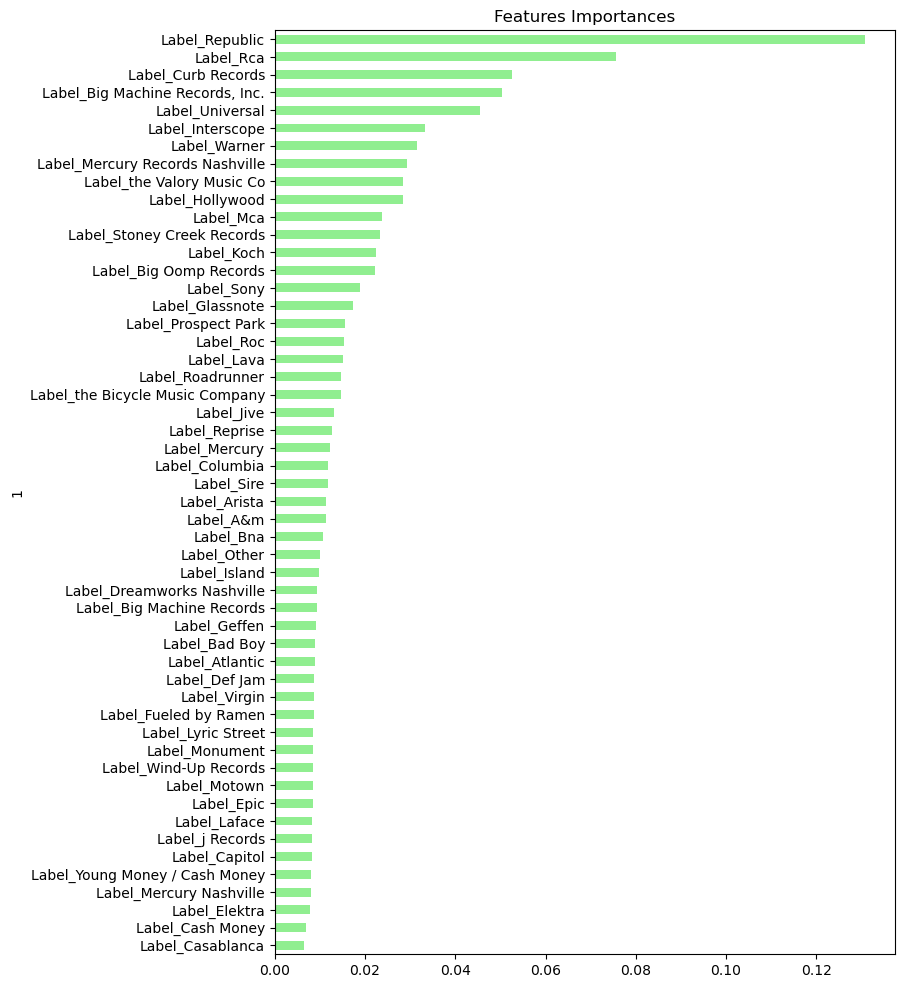

In [74]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(RF_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances',figsize=(8,12), legend=False)